In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# How to calculate summary statistics

## Aggregating statistics

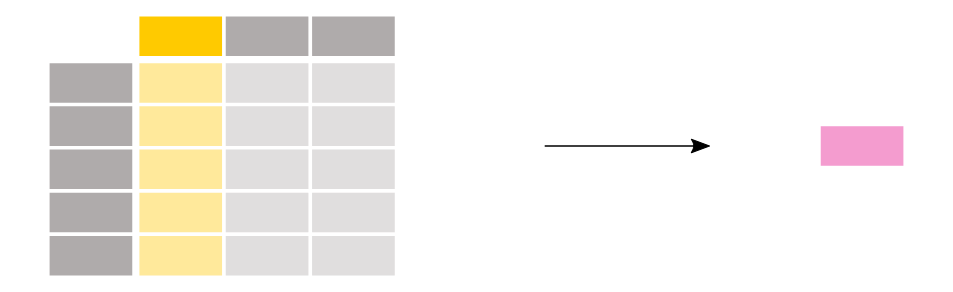

### What is the average age of the Titanic passengers?

In [4]:
titanic["Age"].mean()

np.float64(29.69911764705882)

#### Different statistics are available and can be applied to columns with numerical data. Operations in general exclude missing data and operate across rows by default.

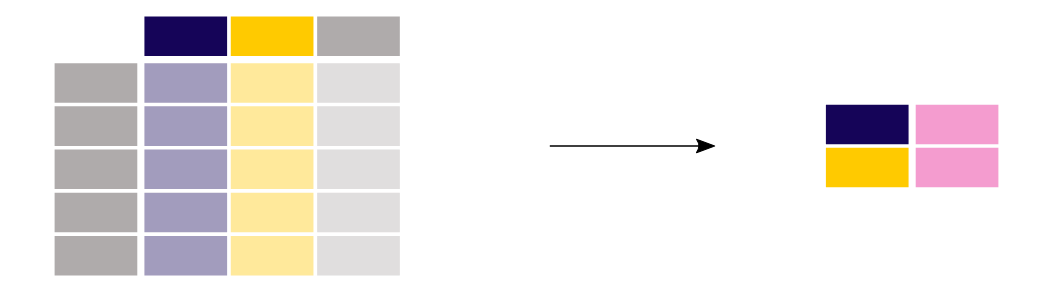

#### What is the median age and ticket fare price of the Titanic passengers?



In [5]:
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

##### The statistic applied to multiple columns of a `DataFrame` (the selection of two columns returns a `DataFrame`.

#### The aggregating statistic can be calculated for multiple columns at the same time.

In [8]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the `DataFrame.agg()` method

In [9]:
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


## Aggregating statistics grouped by category

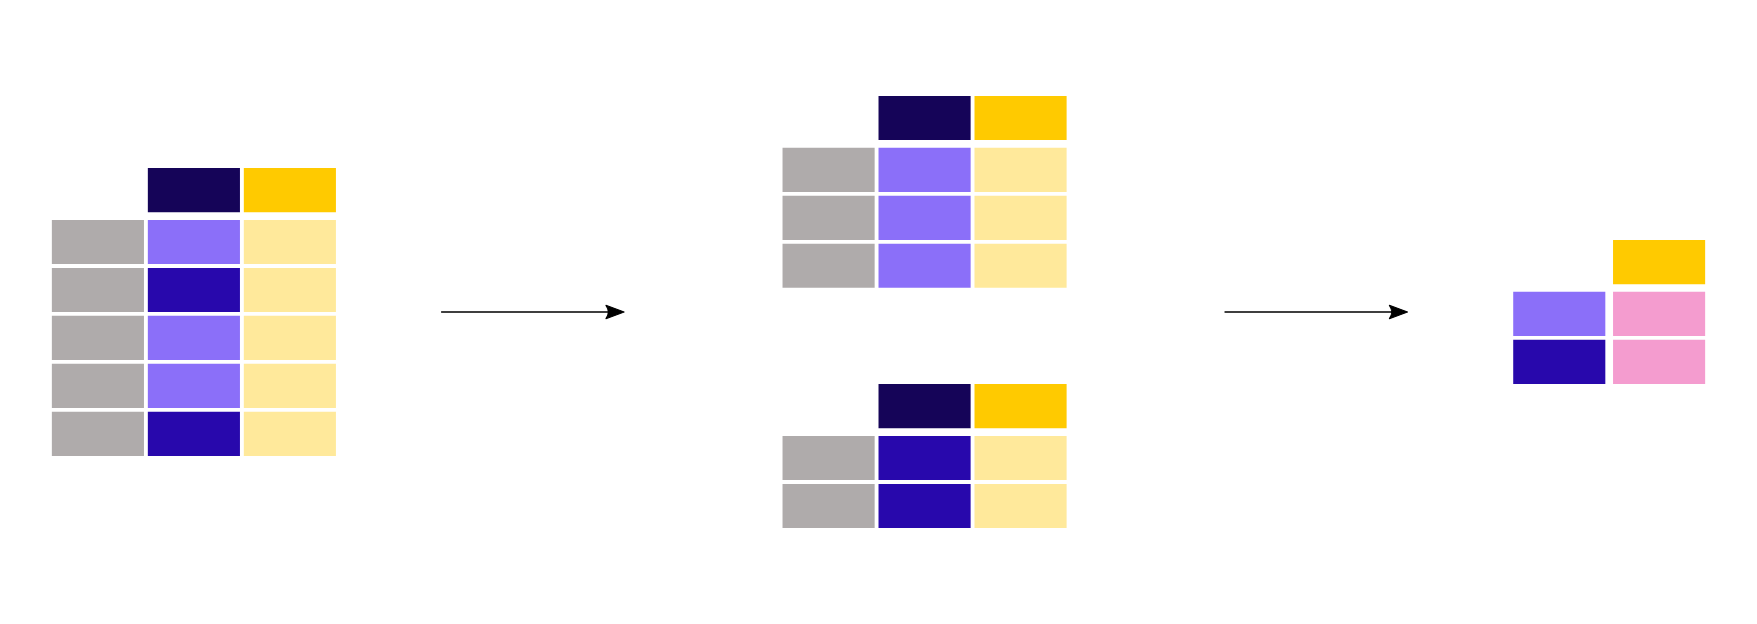

### What is the average age for male versus female Titanic passengers?

In [11]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


##### As our interest is the average age for each gender, a subselection on these two columns is made first: `titanic[["Sex", "Age"]]`. Next, the `groupby()` method is applied on the `Sex` column to make a group per category. The average age for each gender is calculated and returned.

Calculating a given statistic (e.g. `mean` age) for each category in a column (e.g. male/female in the `Sex` column) is a common pattern. The groupby method is used to support this type of operations. This fits in the more general split-apply-combine pattern:
* Split the data into groups
* Apply a function to each group independently
* Combine the results into a data structure

The apply and combine steps are typically done together in pandas.

In the previous example, 2 columns were explicitly selected first. If not, the `mean` method is applied to each column containing numerical columns by passing `numeric_only=True`.

In [12]:
titanic.groupby("Sex").mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


### It does not make much sense to get the average value of the `Pclass`. If we are only interested in the average age for each gender, the selection of columns (rectangular brackets `[]` as usual) is supported on the grouped data as well.

In [13]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

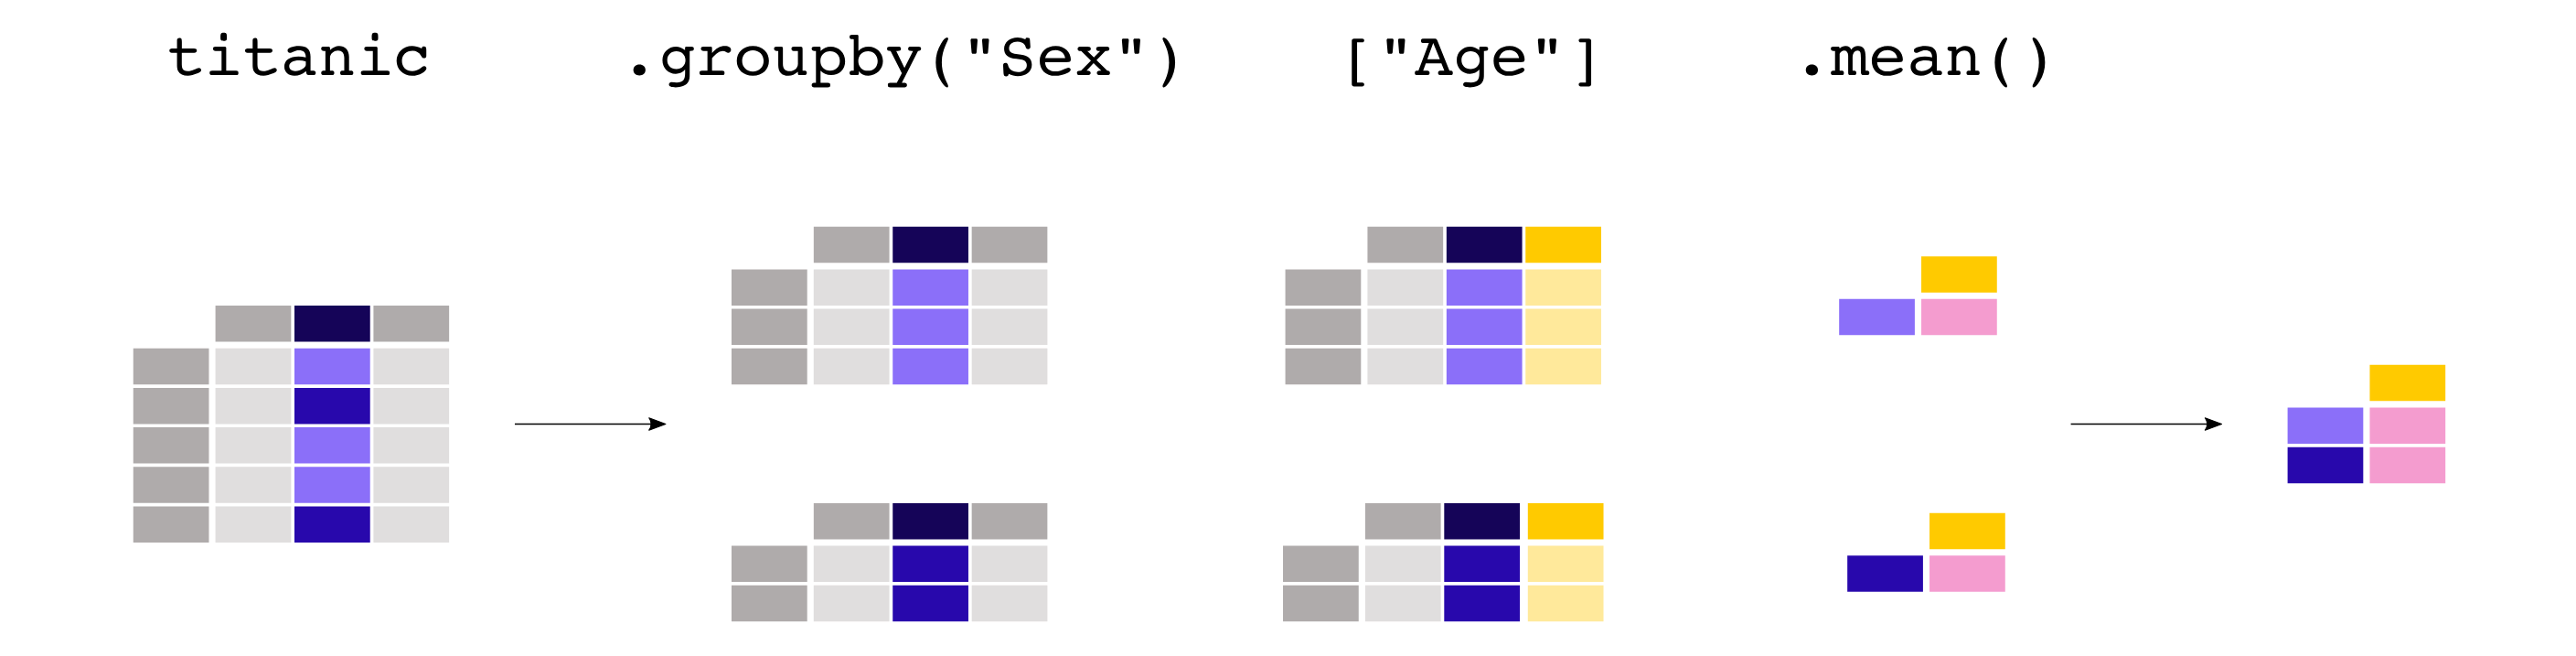

### Note
The `Pclass` column contains numerical data but actually represents 3 categories (or factors) with respectively the labels ‘1’, ‘2’ and ‘3’. Calculating statistics on these does not make much sense. Therefore, pandas provides a `Categorical` data type to handle this type of data.

### What is the mean ticket fare price for each of the sex and cabin class combinations?

In [14]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

#### Grouping can be done by multiple columns at the same time. Provide the column names as a list to the groupby() method.

## Count number of records by category

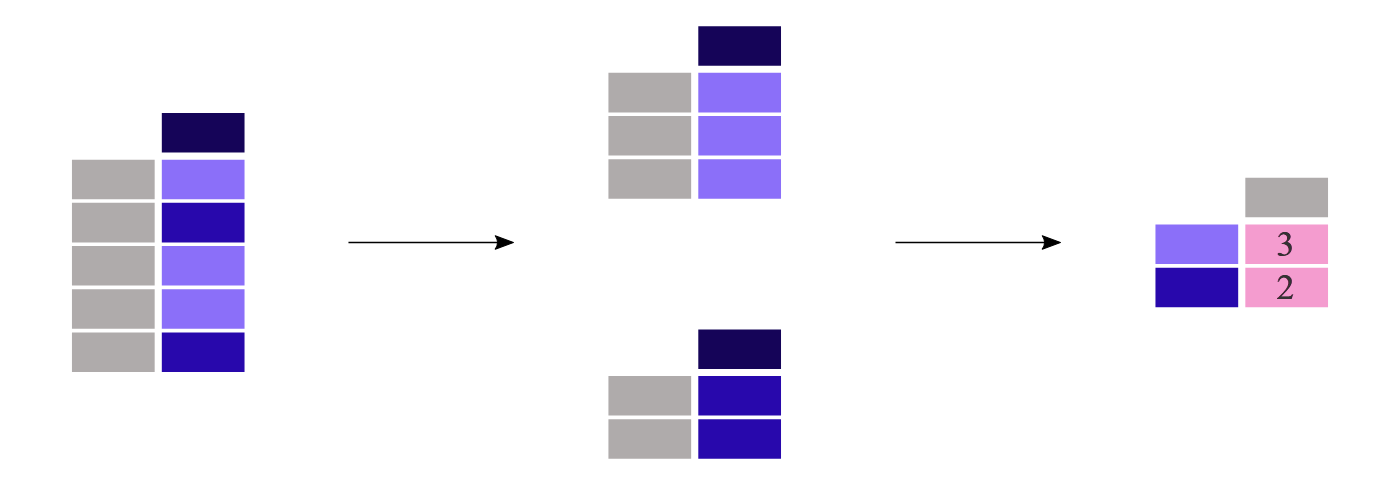

### What is the number of passengers in each of the cabin classes?

In [15]:
titanic["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

##### The value_counts() method counts the number of records for each category in a column.

#### The function is a shortcut, as it is actually a groupby operation in combination with counting of the number of records within each group

In [16]:
titanic.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

### Note

Both size and count can be used in combination with `groupby`. Whereas `size` includes `NaN` values and just provides the number of rows (size of the table), `count` excludes the missing values. In the `value_counts` method, use the `dropna` argument to include or exclude the `NaN` values.

## REMEMBER
* Aggregation statistics can be calculated on entire columns or rows.
* `groupby` provides the power of the split-apply-combine pattern.
* `value_counts` is a convenient shortcut to count the number of entries in each category of a variable.